# Stationary SCM and DAG (IND.) from figure 3(b) in paper

In this notebook we investigate the one SCM where DCBO was not the most succesful method. 

In [1]:
%load_ext autoreload
%autoreload 2

from dcbo.examples.example_setups import setup_ind_scm
from dcbo.utils.sem_utils.toy_sems import StationaryIndependentSEM as IndSEM
from dcbo.utils.sem_utils.sem_estimate import build_sem_hat
from dcbo.experimental.experiments import run_methods_replicates

from numpy.random import seed
seed(seed=0)

## Problem setup

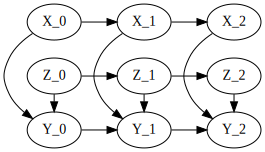

In [2]:
T = 3 # In this example, as in the paper, we consider three time-slices
init_sem, sem, dag_view, G, exploration_sets, intervention_domain, true_objective_values  = setup_ind_scm(T=T)
dag_view

The above DAG is the graphical structure we will be working with and is faithful to the one used in figure one in the paper. `dag` is a networkx object i.e.

In [4]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

and is the one we will use for exploring the optimization methods further down. `dag_view` is simply a convenient way to visualise the structure at hand and is just a string that we visulise using `pygraphviz`:

In [5]:
print(dag_view)

digraph { rankdir=LR; X_0 -> Y_0; Z_0 -> Y_0; X_1 -> Y_1; Z_1 -> Y_1; X_2 -> Y_2; Z_2 -> Y_2;  X_0 -> X_1; Z_0 -> Z_1; Y_0 -> Y_1; X_1 -> X_2; Z_1 -> Z_2; Y_1 -> Y_2;  { rank=same; X_0 Z_0 Y_0 } { rank=same; X_1 Z_1 Y_1 } { rank=same; X_2 Z_2 Y_2 }  }


Notice that we make use of two types of structural equations models: `init_sem` and `sem`. The latter concerns interactions with the first time-slice in the DBN, which has no incoming edges from the previous time-slices, and is only active at $t=0$. For all other time-slices i.e. when $t>0$ the `sem` model is used.

## Other setup parameters 

In [4]:
# Contains the exploration sets we will be investigating
print("Exploration sets:", exploration_sets)
# The intervention domains for the manipulative variables
print("Intervention domains:", intervention_domain) 
# The true outcome values of Y given an optimal intervention on the three time-slices
print("True optimal outcome values:", [r"y^*_{} = {}".format(t,val.round(3)) for t,val in enumerate(true_objective_values)])
# Number of trials
N = 10

Exploration sets: [('X',), ('Z',), ('X', 'Z')]
Intervention domains: {'X': [-4, 1], 'Z': [-3, 3]}
True optimal outcome values: ['y^*_0 = -2.007', 'y^*_1 = -4.013', 'y^*_2 = -6.02']


## Explore optimization methods

Unlike the demo in `stat_scm.ipynb` here we are going to demonstrate the replicate method as used to generate the results in the paper. In all these examples we do not employ any interventional data, just observational.

In [9]:
# See method for argument details
R = 3
results = run_methods_replicates(G=G, 
                                sem=IndSEM, 
                                make_sem_estimator=build_sem_hat, 
                                base_target_variable='Y',
                                intervention_domain = intervention_domain, 
                                methods_list = ['DCBO', 'CBO', 'ABO', 'BO'],
                                obs_samples = None,
                                exploration_sets = exploration_sets,
                                total_timesteps = T,
                                number_of_trials = N, 
                                reps = R, # Number of replicates (how many times we run each method)
                                n_restart = 1,
                                save_data = False,
                                n_obs = 5, # The method samples 5 time-series for each replicate
                                num_anchor_points = 100,
                                sample_anchor_points = True,
                                controlled_experiment=True)

Experiment count:   0%|          | 0/3 [00:00<?, ?it/s]


	>>>DCBO



reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.027466015364883
Optimization restart 1/1, f = 1.1491052228495435
Optimization restart 1/1, f = 4.237616397276231
Optimization restart 1/1, f = 6.2680078678121784


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.001962802222918


Optimization restart 1/1, f = 6.940088605598799


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 4.800110292094576


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 6.049066529868087
Optimization restart 1/1, f = 3.3998238321842473
Optimization restart 1/1, f = 5.71819457019113
Optimization restart 1/1, f = 6.838313772389447


Optimization restart 1/1, f = 6.354594159753268


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.451458455180266
Optimization restart 1/1, f = 2.578964311128325


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 6.729449794114882
Optimization restart 1/1, f = 5.499024526311832
Optimization restart 1/1, f = 2.6821564645680094


Time index: 100%|██████████| 3/3 [00:16<00:00,  5.37s/it]

Optimization restart 1/1, f = -1.3429310572660318

	>>>CBO




reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.v


	>>>ABO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 1.5187341742245208
Optimization restart 1/1, f = -0.2504631046890855
Optimization restart 1/1, f = 7.183125151014731
Optimization restart 1/1, f = 8.830039574498446
Optimization restart 1/1, f = 9.79941194960207
Optimization restart 1/1, f = 10.74253852888659
Optimization restart 1/1, f = 11.549808855486589
Optimization restart 1/1, f = 12.984664619498226

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 13.743675226117743
Optimization restart 1/1, f = 12.107507644708456
Optimization restart 1/1, f = 14.842868747988213
Optimization restart 1/1, f = 15.54171516147916
Optimization restart 1/1, f = 17.56989503561709
Optimization restart 1/1, f = 17.530566287820687
Optimization restart 1/1, f = 17.305067277358425
Optimization restart 1/1, f = 18.537268220568713
Optimization restart 1/1, f = 19.194534885799733


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 20.5519710387718
Optimization restart 1/1, f = 24.0424855171477
Optimization restart 1/1, f = 24.781178212595304
Optimization restart 1/1, f = 25.953493976258006
Optimization restart 1/1, f = 25.96573621332872
Optimization restart 1/1, f = 27.40996283500165
Optimization restart 1/1, f = 29.63669348068237
Optimization restart 1/1, f = 30.17197151428761


Time index: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


Optimization restart 1/1, f = 30.53987257480259
Optimization restart 1/1, f = 31.45960826039309

	>>>BO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 1.5187341742245208
Optimization restart 1/1, f = -0.2504631046890855
Optimization restart 1/1, f = 7.183125151014731
Optimization restart 1/1, f = 8.830039574498446
Optimization restart 1/1, f = 9.79941194960207
Optimization restart 1/1, f = 10.74253852888659


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 11.549808855486589
Optimization restart 1/1, f = 12.984664619498226
Optimization restart 1/1, f = 13.743675226117743
Optimization restart 1/1, f = 1.9232014401563942
Optimization restart 1/1, f = 1.2813454783990457
Optimization restart 1/1, f = 1.1588551094026676
Optimization restart 1/1, f = 8.643475266511238
Optimization restart 1/1, f = 8.995297921670915
Optimization restart 1/1, f = 9.69777100044301
Optimization restart 1/1, f = 10.856057522633261

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 10.85399791552122
Optimization restart 1/1, f = 16.558187201193125
Optimization restart 1/1, f = 1.4311942454539004
Optimization restart 1/1, f = 11.534403737138756
Optimization restart 1/1, f = 12.694326297655458
Optimization restart 1/1, f = 15.225025557462114
Optimization restart 1/1, f = 17.8062834130189
Optimization restart 1/1, f = 20.627679931141166
Optimization restart 1/1, f = 23.123760338214332

 /Users/nd/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/nd/anaconda3/envs/scibo/lib/python3.7/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
Experiment count:  33%|███▎      | 1/3 [00:40<01:20, 40.01s/it]


Optimization restart 1/1, f = 25.634144050032372
Optimization restart 1/1, f = 28.124598073408663

	>>>DCBO



reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 1.1933492381936257
Optimization restart 1/1, f = 5.017550871096661
Optimization restart 1/1, f = 3.7762457216210565
Optimization restart 1/1, f = 6.358611522367843


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.094935893895157


Optimization restart 1/1, f = 5.671089476083038


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 3.3852071818745157
Optimization restart 1/1, f = 5.453545662515291


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 4.7966109048359495
Optimization restart 1/1, f = 6.041778197571478
Optimization restart 1/1, f = 6.706168233624625


Optimization restart 1/1, f = 6.2162233696440845


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.450300099345417
Optimization restart 1/1, f = 2.623123249483835


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 6.682656716258079
Optimization restart 1/1, f = 2.697006328110563
Optimization restart 1/1, f = 3.4028701427403942


Time index: 100%|██████████| 3/3 [00:16<00:00,  5.39s/it]

Optimization restart 1/1, f = 3.4474479909049403

	>>>CBO




reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.v


	>>>ABO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 1.5247448852414198
Optimization restart 1/1, f = 4.2363483993603595
Optimization restart 1/1, f = 4.448481540408611
Optimization restart 1/1, f = 3.8618296471642495
Optimization restart 1/1, f = 3.5060653002441224
Optimization restart 1/1, f = 2.8074034995130828
Optimization restart 1/1, f = 5.01385430974232

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 3.276349966986518
Optimization restart 1/1, f = -0.7658319266178419
Optimization restart 1/1, f = 8.78193213375969
Optimization restart 1/1, f = 8.175463762024318
Optimization restart 1/1, f = 9.53945077336904
Optimization restart 1/1, f = 10.291239314333422
Optimization restart 1/1, f = 9.403159201862769
Optimization restart 1/1, f = 9.94322299986925

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 10.768345901241622
Optimization restart 1/1, f = 11.615867514602964
Optimization restart 1/1, f = 13.746696583673396
Optimization restart 1/1, f = 19.639992987765616
Optimization restart 1/1, f = 19.29332147223321
Optimization restart 1/1, f = 23.10810846718359
Optimization restart 1/1, f = 24.444879781787023
Optimization restart 1/1, f = 26.61971912836332


Time index: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]


Optimization restart 1/1, f = 26.627530415292153
Optimization restart 1/1, f = 28.024419876702467
Optimization restart 1/1, f = 30.80434473899292
Optimization restart 1/1, f = 33.101882932425845

	>>>BO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 1.5247448852414198
Optimization restart 1/1, f = 4.2363483993603595
Optimization restart 1/1, f = 4.448481540408611
Optimization restart 1/1, f = 3.8618296471642495
Optimization restart 1/1, f = 3.5060653002441224

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 2.8074034995130828
Optimization restart 1/1, f = 5.01385430974232
Optimization restart 1/1, f = 3.276349966986518
Optimization restart 1/1, f = -0.7658319266178419
Optimization restart 1/1, f = 1.4562141664662582
Optimization restart 1/1, f = 1.465974848354831
Optimization restart 1/1, f = 4.5117481752281705
Optimization restart 1/1, f = 6.320883985358272
Optimization restart 1/1, f = 9.128551389498636
Optimization restart 1/1, f = 9.84678274659761


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 10.187981166069243
Optimization restart 1/1, f = 10.955158563052006
Optimization restart 1/1, f = 10.851117684388255
Optimization restart 1/1, f = 2.1351019322375366
Optimization restart 1/1, f = 8.160809791896632
Optimization restart 1/1, f = 9.594042562448188
Optimization restart 1/1, f = 10.536543478812176
Optimization restart 1/1, f = 11.389004711139304
Optimization restart 1/1, f = 14.965712525938253


Experiment count:  67%|██████▋   | 2/3 [01:20<00:40, 40.42s/it]

Optimization restart 1/1, f = 16.899806430089043
Optimization restart 1/1, f = 18.307932364435402
Optimization restart 1/1, f = 20.293586552425765

	>>>DCBO



reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 0.6423109383295345
Optimization restart 1/1, f = 5.0157691301505745
Optimization restart 1/1, f = 4.095717700828514
Optimization restart 1/1, f = 6.29326670573613


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.604518490241474


Optimization restart 1/1, f = 7.089166172580571


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 4.5671766947718595
Optimization restart 1/1, f = 5.159454804141797
Optimization restart 1/1, f = 6.698466564619002
Optimization restart 1/1, f = 5.489284371082586
Optimization restart 1/1, f = 6.350314136706514
Optimization restart 1/1, f = 8.690388899155817


Optimization restart 1/1, f = 10.105532814740135


reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.100805239219566
Optimization restart 1/1, f = 3.0389096825869037


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 5.778542483900703
Optimization restart 1/1, f = 2.483518458237878
Optimization restart 1/1, f = 5.163537498560519


Time index: 100%|██████████| 3/3 [00:16<00:00,  5.45s/it]

Optimization restart 1/1, f = 6.401923862575113

	>>>CBO




reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.v


	>>>ABO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 3.4911205913212617
Optimization restart 1/1, f = 3.7849546519476247
Optimization restart 1/1, f = 4.819575873661824
Optimization restart 1/1, f = 5.201864919571612
Optimization restart 1/1, f = 6.952621248031289
Optimization restart 1/1, f = 7.217377716910006
Optimization restart 1/1, f = 7.475079293276561
Optimization restart 1/1, f = 12.234263324033316

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 12.749704604250589
Optimization restart 1/1, f = 16.94776419244497
Optimization restart 1/1, f = 16.910699443108474
Optimization restart 1/1, f = 19.911274260210504
Optimization restart 1/1, f = 20.576363928275132
Optimization restart 1/1, f = 23.091900084413485
Optimization restart 1/1, f = 23.21586309569138
Optimization restart 1/1, f = 25.23646706179814


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 25.8109902091681
Optimization restart 1/1, f = 27.102848380902177
Optimization restart 1/1, f = 28.484405724445686
Optimization restart 1/1, f = 28.891170415877625
Optimization restart 1/1, f = 30.97439875199363
Optimization restart 1/1, f = 31.00454811636761
Optimization restart 1/1, f = 31.055717021876955


Time index: 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]


Optimization restart 1/1, f = 32.176705200888065
Optimization restart 1/1, f = 32.75158576663269
Optimization restart 1/1, f = 34.90954567513275
Optimization restart 1/1, f = 32.479629107007376

	>>>BO



reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 3.4911205913212617
Optimization restart 1/1, f = 3.7849546519476247
Optimization restart 1/1, f = 4.819575873661824
Optimization restart 1/1, f = 5.201864919571612
Optimization restart 1/1, f = 6.952621248031289

reconstraining parameters GP_regression.rbf.variance



Optimization restart 1/1, f = 7.217377716910006
Optimization restart 1/1, f = 7.475079293276561
Optimization restart 1/1, f = 12.234263324033316
Optimization restart 1/1, f = 12.749704604250589
Optimization restart 1/1, f = 1.8526951927487538
Optimization restart 1/1, f = 7.690315148765879
Optimization restart 1/1, f = 9.08620713708614
Optimization restart 1/1, f = 10.111221927700088


reconstraining parameters GP_regression.rbf.variance


Optimization restart 1/1, f = 10.965041132493997
Optimization restart 1/1, f = 14.203239330993075
Optimization restart 1/1, f = 16.042975021268383
Optimization restart 1/1, f = 17.433658595228124
Optimization restart 1/1, f = 19.29614548904263
Optimization restart 1/1, f = 3.9512721080207402
Optimization restart 1/1, f = 3.729493369277612
Optimization restart 1/1, f = 3.6227533248426833
Optimization restart 1/1, f = 10.949476833382809
Optimization restart 1/1, f = 11.755009565449118

Experiment count: 100%|██████████| 3/3 [02:02<00:00, 40.97s/it]


Optimization restart 1/1, f = 14.747883953257983
Optimization restart 1/1, f = 14.869102175490937
Optimization restart 1/1, f = 15.974184133523053
Optimization restart 1/1, f = 16.279009170642322


## Analyse results and plot

In [10]:
from dcbo.experimental.analyse_results import get_relevant_results, elaborate
from dcbo.utils.plotting import plot_expected_opt_curve_paper
from matplotlib.pyplot import rc

In [11]:
# Since we didn't save the results we cannot use the pickled file so we have to convert results to the correct format
data = get_relevant_results(results=results,replicates=R)
exp_optimal_outcome_values_during_trials, exp_per_trial_cost = elaborate(number_of_interventions=None, 
                                                                         n_replicates=R, 
                                                                         data=data, 
                                                                         best_objective_values=true_objective_values, 
                                                                         T=T)

### Plot results

In [12]:
plot_params = {
    "linewidth": 3,
    "linewidth_opt": 4,
    "alpha": 0.1,
    "xlim_max": N,
    "ncols": 5,
    "loc_legend": "lower right",
    "size_ticks": 20,
    "size_labels": 20,
    "xlabel": r'$\texttt{cost}(\mathbf{X}_{s,t}, \mathbf{x}_{s,t})$',
    "labels": {'DCBO': 'DCBO', 'CBO': 'CBO', 'ABO': 'ABO', 'BO': 'BO', 'True': r'$\mathbb{E} \left [Y_t \mid \textrm{do}(\mathbf{X}_{s,t}^\star = \mathbf{x}_{s,t}^\star) \right]$'},
    "colors": {'DCBO': 'blue', 'CBO': 'green', 'ABO': 'orange', 'BO': 'red', 'True': 'black'},
    "line_styles": {'DCBO': '-', 'CBO': '--', 'ABO': 'dashdot', 'BO': '-', 'True': ':'},
    "width":10
}
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amssymb}')
rc('font', family='serif')
rc('font', size=20)

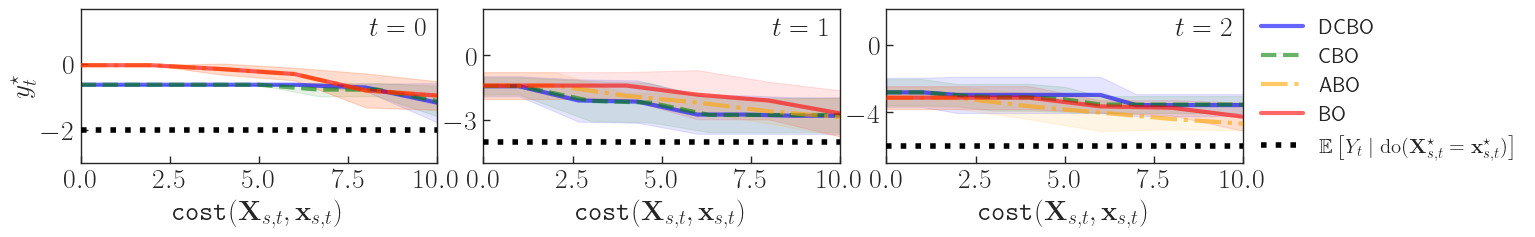

In [13]:
# Each frame corresponds to one time-slice.
plot_expected_opt_curve_paper(T,
    true_objective_values,
    exp_per_trial_cost,
    exp_optimal_outcome_values_during_trials,
    plot_params,  
    fig_size = (15,2))